In [16]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings("ignore")


In [39]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    data['LiveIBI'] = data['LiveIBI'].str.strip('[]').str.split(',').apply(lambda x: [float(i.strip()) for i in x])
    return data
data = load_data('/content/drive/MyDrive/ASEE Feb 2024 HC calcs/HC all Live IBI.csv')

In [3]:
data

,Participant,Session,LiveIBI
0,3B4,B4,"[608.0, 636.0, 664.0, 620.0, 628.0, 605.0, 593..."
1,2B4,B4,"[690.0, 705.0, 677.0, 697.0, 718.0, 695.0, 682..."
2,1B4,B4,"[795.0, 785.0, 759.0, 749.0, 746.0, 777.0, 812..."
3,11B4,B4,"[592.0, 608.0, 605.0, 1290.0, 692.0, 631.0, 65..."
4,4B4,B4,"[869.0, 892.0, 772.0, 757.0, 753.0, 682.0, 688..."
5,6B4,B4,"[882.0, 864.0, 882.0, 918.0, 867.0, 744.0, 792..."
6,7B4,B4,"[708.0, 787.0, 754.0, 831.0, 753.0, 749.0, 839..."
7,15B4,B4,"[572.0, 661.0, 777.0, 749.0, 682.0, 659.0, 590..."
8,13B4,B4,"[626.0, 592.0, 600.0, 559.0, 595.0, 564.0, 567..."
9,12B4,B4,"[585.0, 654.0, 623.0, 600.0, 641.0, 736.0, 712..."


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.signal import welch


# Compute coherence ratio
def compute_coherence_ratio(ibi_data):
    hr_data = 60000 / np.array(ibi_data)
    freqs, psd = welch(hr_data, fs=4.0, nperseg=len(hr_data), scaling='density')
    lf_mask = (freqs >= 0.04) & (freqs <= 0.26)
    lf_psd = psd[lf_mask]
    peak_power = np.max(lf_psd)
    total_power = np.sum(psd)
    coherence_ratio = peak_power / (total_power - peak_power)
    return coherence_ratio

data['Coherence Ratio'] = data['LiveIBI'].apply(compute_coherence_ratio)

# Compute heart coherence
def compute_heart_coherence(ibi_data):
    hr_data = 60000 / np.array(ibi_data)
    freqs, psd = welch(hr_data, fs=4.0, nperseg=len(hr_data), scaling='density')
    lf_mask = (freqs >= 0.04) & (freqs <= 0.26)
    lf_freqs = freqs[lf_mask]
    lf_psd = psd[lf_mask]
    peak_freq = lf_freqs[np.argmax(lf_psd)]
    window_mask = (lf_freqs >= (peak_freq - 0.015)) & (lf_freqs <= (peak_freq + 0.015))
    coherence_value = np.trapz(lf_psd[window_mask])
    return coherence_value

data['Heart Coherence'] = data['LiveIBI'].apply(compute_heart_coherence)

# Preprocess IBI data by removing outliers
def preprocess_ibi(ibi_data):
    processed_ibi = [ibi for ibi in ibi_data if 300 <= ibi <= 1500]
    return processed_ibi

data['Processed LiveIBI'] = data['LiveIBI'].apply(preprocess_ibi)
data['Processed Heart Coherence'] = data['Processed LiveIBI'].apply(compute_heart_coherence)
data['Processed Coherence Ratio'] = data['Processed LiveIBI'].apply(compute_coherence_ratio)


In [7]:
data

,Participant,Session,LiveIBI,Coherence Ratio,Heart Coherence,Processed LiveIBI,Processed Heart Coherence,Processed Coherence Ratio
0,3B4,B4,"[608.0, 636.0, 664.0, 620.0, 628.0, 605.0, 593...",0.021427,3049.978766,"[608.0, 636.0, 664.0, 620.0, 628.0, 605.0, 593...",2329.418604,0.023510
1,2B4,B4,"[690.0, 705.0, 677.0, 697.0, 718.0, 695.0, 682...",0.009671,2089.321375,"[690.0, 705.0, 677.0, 697.0, 718.0, 695.0, 682...",1163.262195,0.016294
2,1B4,B4,"[795.0, 785.0, 759.0, 749.0, 746.0, 777.0, 812...",0.077685,1575.601371,"[795.0, 785.0, 759.0, 749.0, 746.0, 777.0, 812...",1575.601371,0.077685
3,11B4,B4,"[592.0, 608.0, 605.0, 1290.0, 692.0, 631.0, 65...",0.013492,4363.311769,"[592.0, 608.0, 605.0, 1290.0, 692.0, 631.0, 65...",2385.363458,0.015883
4,4B4,B4,"[869.0, 892.0, 772.0, 757.0, 753.0, 682.0, 688...",0.030681,276.320917,"[869.0, 892.0, 772.0, 757.0, 753.0, 682.0, 688...",250.774541,0.030876
5,6B4,B4,"[882.0, 864.0, 882.0, 918.0, 867.0, 744.0, 792...",0.016999,836.300657,"[882.0, 864.0, 882.0, 918.0, 867.0, 744.0, 792...",345.566526,0.022672
6,7B4,B4,"[708.0, 787.0, 754.0, 831.0, 753.0, 749.0, 839...",0.010778,272.352499,"[708.0, 787.0, 754.0, 831.0, 753.0, 749.0, 839...",316.087266,0.010300
7,15B4,B4,"[572.0, 661.0, 777.0, 749.0, 682.0, 659.0, 590...",0.021468,857.512710,"[572.0, 661.0, 777.0, 749.0, 682.0, 659.0, 590...",704.781144,0.021491
8,13B4,B4,"[626.0, 592.0, 600.0, 559.0, 595.0, 564.0, 567...",0.043451,980.628371,"[626.0, 592.0, 600.0, 559.0, 595.0, 564.0, 567...",970.772879,0.046509
9,12B4,B4,"[585.0, 654.0, 623.0, 600.0, 641.0, 736.0, 712...",0.019843,2127.055522,"[585.0, 654.0, 623.0, 600.0, 641.0, 736.0, 712...",1937.861635,0.023209


In [10]:
data.to_csv("data.csv")

In [12]:
updated_data = data

In [13]:
# Correcting the Participant_IDs for "During" and "After" sessions based on the 'Participant' column
updated_data['Participant_ID'] = updated_data['Participant'].str.extract('(\d+)')

# Verifying the changes
updated_data[['Participant', 'Session', 'Participant_ID']].drop_duplicates()


,Participant,Session,Participant_ID
0,3B4,B4,3
1,2B4,B4,2
2,1B4,B4,1
3,11B4,B4,11
4,4B4,B4,4
5,6B4,B4,6
6,7B4,B4,7
7,15B4,B4,15
8,13B4,B4,13
9,12B4,B4,12


In [38]:
# Data Cleaning: Strip spaces from the 'Participant' column values
updated_data['Participant'] = updated_data['Participant'].str.strip()

# Data Segregation: Separate data based on 'Before', 'During', and 'After' sessions
before_data = updated_data[updated_data['Participant'].str.endswith('B4')]
during_data = updated_data[updated_data['Participant'].str.endswith('Med')]
after_data = updated_data[updated_data['Participant'].str.endswith('After')]

# Extracting the core participant number from 'Participant' column (e.g., '1' from '1B4')
before_data['Participant_Number'] = before_data['Participant'].str.extract('(\d+)').astype(int)
during_data['Participant_Number'] = during_data['Participant'].str.extract('(\d+)').astype(int)
after_data['Participant_Number'] = after_data['Participant'].str.extract('(\d+)').astype(int)

# Setting the 'Participant_Number' as index for alignment
before_data.set_index('Participant_Number', inplace=True)
during_data.set_index('Participant_Number', inplace=True)
after_data.set_index('Participant_Number', inplace=True)

# Verify the data segregation
before_data.head()
during_data.head()
after_data.head()


,Participant,Session,LiveIBI,Coherence Ratio,Heart Coherence,Processed LiveIBI,Processed Heart Coherence,Processed Coherence Ratio,Participant_ID
Participant_Number,,,,,,,,,
3,03After,After,"[461.0, 590.0, 492.0, 462.0, 569.0, 539.0, 530...",0.032170,760.132643,"[461.0, 590.0, 492.0, 462.0, 569.0, 539.0, 530...",760.132643,0.032170,03
2,02After,After,"[1179.0, 680.0, 697.0, 752.0, 784.0, 846.0, 87...",0.017179,3418.384127,"[1179.0, 680.0, 697.0, 752.0, 784.0, 846.0, 87...",2931.534535,0.031242,02
1,01After,After,"[859.0, 823.0, 785.0, 797.0, 782.0, 790.0, 374...",0.009739,437.371773,"[859.0, 823.0, 785.0, 797.0, 782.0, 790.0, 374...",143.565687,0.019564,01
11,11After,After,"[680.0, 682.0, 689.0, 654.0, 664.0, 657.0, 666...",0.035490,801.839362,"[680.0, 682.0, 689.0, 654.0, 664.0, 657.0, 666...",801.839362,0.035490,11
4,04After,After,"[695.0, 1041.0, 1523.0, 690.0, 592.0, 736.0, 5...",0.026115,2063.195647,"[695.0, 1041.0, 690.0, 592.0, 736.0, 552.0, 62...",1082.125472,0.061166,04


# Plotting 7 and 12 just at random as they peak the most

In [44]:
before_data_raw = pd.read_csv('/content/drive/MyDrive/ASEE Feb 2024 HC calcs/before_data.csv')
during_data_raw = pd.read_csv('/content/drive/MyDrive/ASEE Feb 2024 HC calcs/during_data.csv')
after_data_raw = pd.read_csv('/content/drive/MyDrive/ASEE Feb 2024 HC calcs/after_data.csv')


In [45]:
def compute_heart_coherence_time_series(ibi_data):
    """Compute heart coherence as a time series from raw IBI data."""
    hr_data = 60000 / np.array(ibi_data)
    freqs, psd = welch(hr_data, fs=4.0, nperseg=len(hr_data), scaling='density')
    lf_mask = (freqs >= 0.04) & (freqs <= 0.26)
    lf_psd = psd[lf_mask]
    return lf_psd

# Extracting raw IBI data for participants 7 and 12 from each session
before_ibi_7 = eval(before_data_raw[before_data_raw['Participant_Number'] == 7]['LiveIBI'].iloc[0])
before_ibi_12 = eval(before_data_raw[before_data_raw['Participant_Number'] == 12]['LiveIBI'].iloc[0])

during_ibi_7 = eval(during_data_raw[during_data_raw['Participant_Number'] == 7]['LiveIBI'].iloc[0]) if 7 in during_data_raw['Participant_Number'].values else []
during_ibi_12 = eval(during_data_raw[during_data_raw['Participant_Number'] == 12]['LiveIBI'].iloc[0])

after_ibi_7 = eval(after_data_raw[after_data_raw['Participant_Number'] == 7]['LiveIBI'].iloc[0]) if 7 in after_data_raw['Participant_Number'].values else []
after_ibi_12 = eval(after_data_raw[after_data_raw['Participant_Number'] == 12]['LiveIBI'].iloc[0])

# Computing heart coherence time series for participants 7 and 12
before_coherence_7 = compute_heart_coherence_time_series(before_ibi_7)
before_coherence_12 = compute_heart_coherence_time_series(before_ibi_12)

during_coherence_7 = compute_heart_coherence_time_series(during_ibi_7)
during_coherence_12 = compute_heart_coherence_time_series(during_ibi_12)

after_coherence_7 = compute_heart_coherence_time_series(after_ibi_7)
after_coherence_12 = compute_heart_coherence_time_series(after_ibi_12)

before_coherence_7, before_coherence_12, during_coherence_7, during_coherence_12, after_coherence_7, after_coherence_12


(array([ 31.96143325, 130.95261676,  51.68646951,  13.45950894,
         13.36615013,  11.4382879 ,  39.22575112,  41.63192502,
          1.7419825 ,  46.60733013, 161.28231094,  35.17985422,
         56.82402489, 158.64168336,  24.36134594,   7.22013619,
          8.25196557,  75.91609617,  61.98455232,  11.02952713,
         11.7896781 ,  42.36423937,  45.97918991, 104.03313861,
         19.86600572,   1.23521291,  36.12283151,  12.49103286,
          1.80980821,  22.49044681,   8.53628486,  96.86542853,
         83.63561657,   3.66557481,   6.50150733,  31.51700139,
         71.21455277, 117.45083583,  14.84731114, 122.17231802,
        156.16074491,  84.95209273,  15.98808312,  86.35183586]),
 array([ 115.86640246,   88.8896727 ,  695.89657494,  181.68212634,
        1282.962246  ,  214.38171138,  200.16230102,  217.24456508,
         191.43030678,  143.23408238,  438.89051393,   50.11665238,
         249.34915654,  346.09154161,  407.73335684, 1019.7596528 ,
          45.59522279,

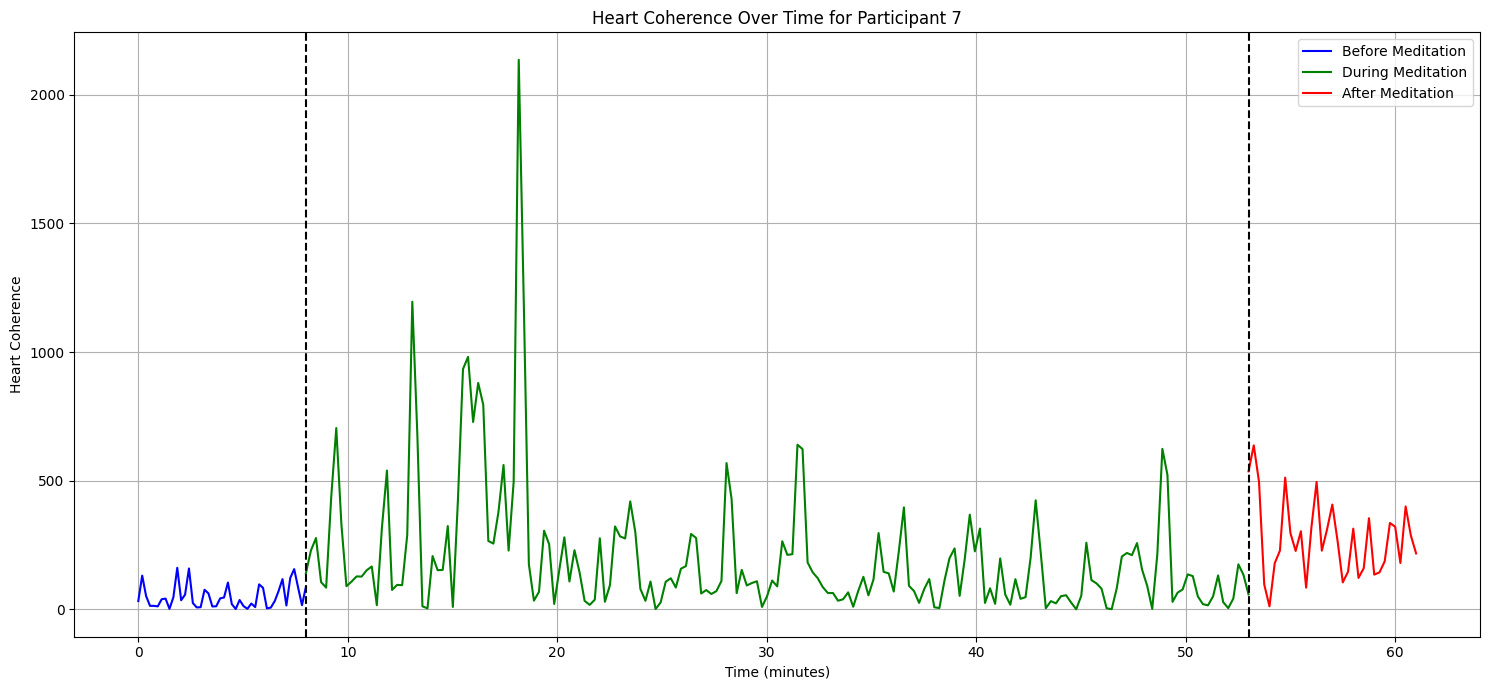

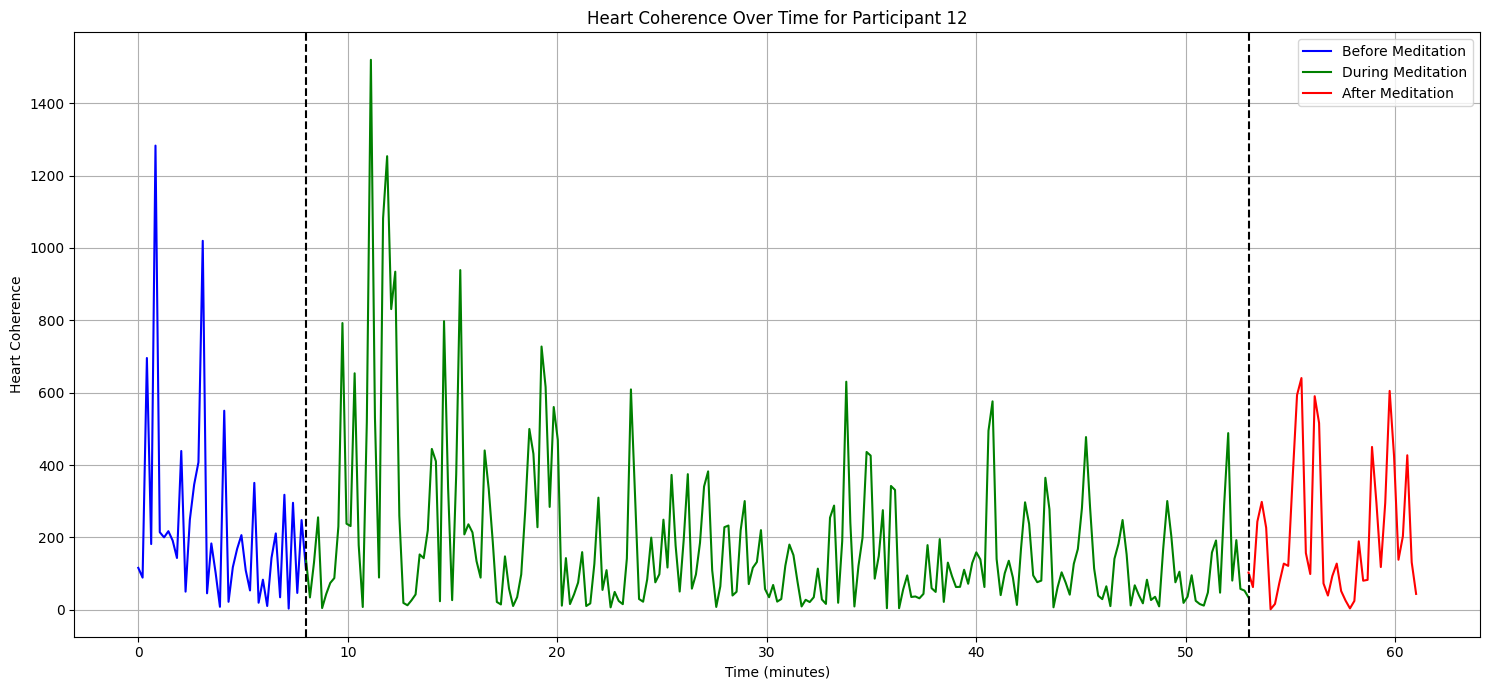

In [46]:
import matplotlib.pyplot as plt

def plot_heart_coherence_time_series(participant, before_coherence, during_coherence, after_coherence):
    """Plot the heart coherence time series for a given participant."""
    plt.figure(figsize=(15, 7))

    # Time vectors for each session based on the length of the coherence values
    time_before = np.linspace(0, 8, len(before_coherence))
    time_during = np.linspace(8, 8 + len(during_coherence)*45/len(during_coherence), len(during_coherence))
    time_after = np.linspace(8 + len(during_coherence)*45/len(during_coherence), 8 + len(during_coherence)*45/len(during_coherence) + 8, len(after_coherence))

    plt.plot(time_before, before_coherence, label='Before Meditation', color='blue')
    plt.plot(time_during, during_coherence, label='During Meditation', color='green')
    plt.plot(time_after, after_coherence, label='After Meditation', color='red')

    # Adding dotted lines to separate the sessions
    plt.axvline(x=8, color='black', linestyle='--')
    plt.axvline(x=8 + len(during_coherence)*45/len(during_coherence), color='black', linestyle='--')

    # Labeling and formatting the plot
    plt.title(f'Heart Coherence Over Time for Participant {participant}')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Heart Coherence')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting for Participant 7
plot_heart_coherence_time_series(7, before_coherence_7, during_coherence_7, after_coherence_7)

# Plotting for Participant 12
plot_heart_coherence_time_series(12, before_coherence_12, during_coherence_12, after_coherence_12)


In [48]:
# Correctly calculating the average heart coherence for each session and segment

# Checking if during_coherence_7 and after_coherence_7 are not empty
is_during_7_present = len(during_coherence_7) > 0
is_after_7_present = len(after_coherence_7) > 0

# Calculating average heart coherence values for participants 7 and 12
avg_coherence_7 = {
    "Before": np.mean(before_coherence_7),
    "During - Emotional Review": np.mean(during_coherence_7[:15]) if is_during_7_present else np.nan,
    "During - Analyzing Challenges": np.mean(during_coherence_7[15:30]) if is_during_7_present else np.nan,
    "During - Rehearsing Solutions": np.mean(during_coherence_7[30:]) if is_during_7_present else np.nan,
    "After": np.mean(after_coherence_7) if is_after_7_present else np.nan
}

avg_coherence_12 = {
    "Before": np.mean(before_coherence_12),
    "During - Emotional Review": np.mean(during_coherence_12[:15]),
    "During - Analyzing Challenges": np.mean(during_coherence_12[15:30]),
    "During - Rehearsing Solutions": np.mean(during_coherence_12[30:]),
    "After": np.mean(after_coherence_12)
}

avg_coherence_values = {"Participant 7": avg_coherence_7, "Participant 12": avg_coherence_12}
avg_coherence_values


{'Participant 7': {'Before': 49.56372099672092,
  'During - Emotional Review': 206.42575206523955,
  'During - Analyzing Challenges': 275.9281005689189,
  'During - Rehearsing Solutions': 192.2939252938336,
  'After': 273.82218273854085},
 'Participant 12': {'Before': 232.23068176014,
  'During - Emotional Review': 206.97483466262963,
  'During - Analyzing Challenges': 494.42014634969377,
  'During - Rehearsing Solutions': 160.89508944481057,
  'After': 209.22051806533315}}

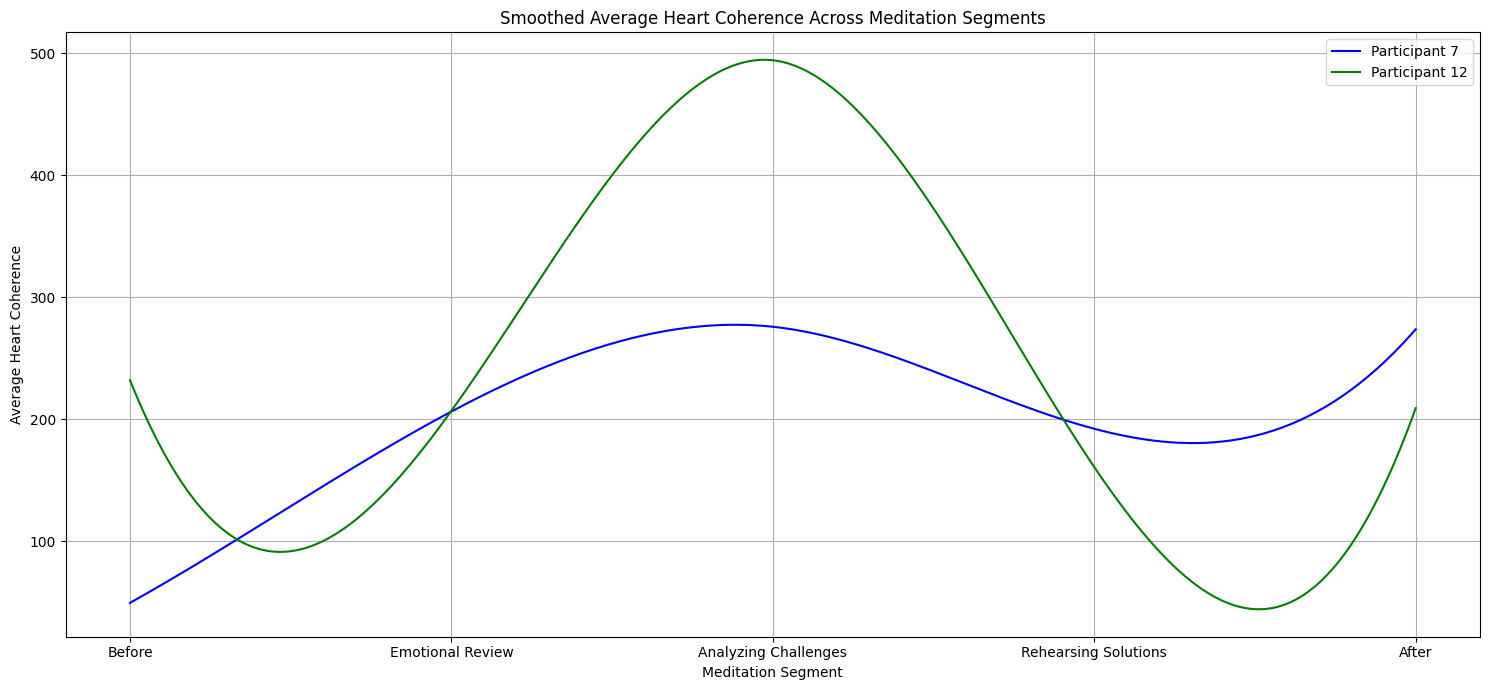

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# Extracting the average heart coherence values for plotting
segments = ['Before', 'Emotional Review', 'Analyzing Challenges', 'Rehearsing Solutions', 'After']
values_7 = list(avg_coherence_values['Participant 7'].values())
values_12 = list(avg_coherence_values['Participant 12'].values())

# Smoothing the curve using cubic spline interpolation
xnew = np.linspace(0, 4, 300)  # 300 represents number of points to make between segments
spl_7 = make_interp_spline(range(5), values_7, k=3)
smooth_7 = spl_7(xnew)

spl_12 = make_interp_spline(range(5), values_12, k=3)
smooth_12 = spl_12(xnew)

# Plotting the smoothed average heart coherence values for participants 7 and 12
plt.figure(figsize=(15, 7))
plt.plot(xnew, smooth_7, label='Participant 7', color='blue')
plt.plot(xnew, smooth_12, label='Participant 12', color='green')

# Adding segment markers and labels
plt.xticks(ticks=range(5), labels=segments)

# Labeling and formatting the plot
plt.title('Smoothed Average Heart Coherence Across Meditation Segments')
plt.xlabel('Meditation Segment')
plt.ylabel('Average Heart Coherence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate the shift for each participant


In [17]:
before_during_shift_coherence = during_data['Processed Heart Coherence'] - before_data['Processed Heart Coherence']
before_after_shift_coherence = after_data['Processed Heart Coherence'] - before_data['Processed Heart Coherence']

before_during_shift_ratio = during_data['Processed Coherence Ratio'] - before_data['Processed Coherence Ratio']
before_after_shift_ratio = after_data['Processed Coherence Ratio'] - before_data['Processed Coherence Ratio']

# Create a dataframe to store the shifts
shift_data = pd.DataFrame({
    'Before-During Shift Coherence': before_during_shift_coherence,
    'Before-After Shift Coherence': before_after_shift_coherence,
    'Before-During Shift Ratio': before_during_shift_ratio,
    'Before-After Shift Ratio': before_after_shift_ratio
})

# Display the calculated shifts for each participant
shift_data.head()


,Before-During Shift Coherence,Before-After Shift Coherence,Before-During Shift Ratio,Before-After Shift Ratio
Participant_Number,,,,
3,1874.660932,-1569.285960,-0.014423,0.008660
2,1097.339319,1768.272340,-0.012667,0.014948
1,-536.774488,-1432.035683,-0.023347,-0.058121
11,3130.891657,-1583.524095,-0.004244,0.019608
4,4230.303989,831.350932,-0.023773,0.030290


In [22]:
average_shifts = shift_data.mean()
average_shifts

Before-During Shift Coherence    3796.124859
Before-After Shift Coherence     -321.539372
Before-During Shift Ratio          -0.014637
Before-After Shift Ratio            0.002345
dtype: float64

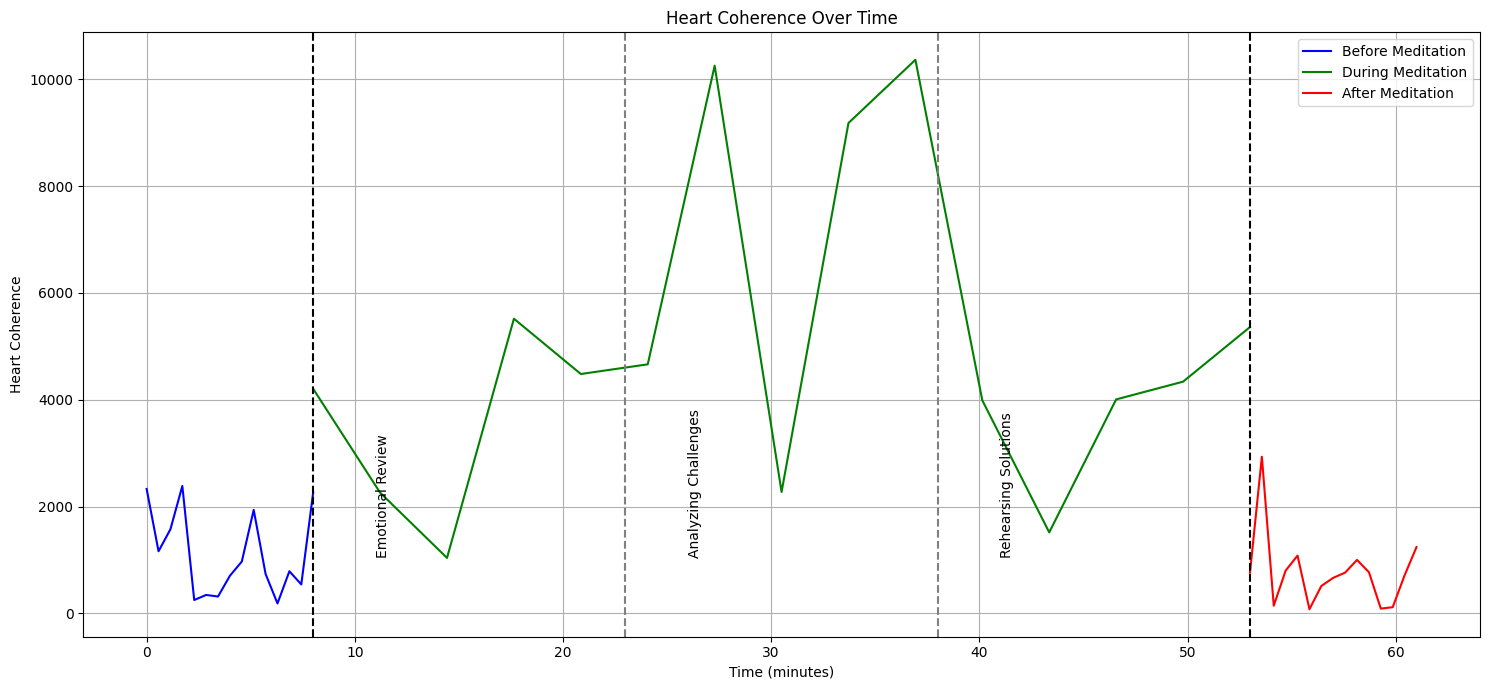

In [37]:
# Plotting with added meditation component divisions within the "During Meditation" segment

# Adding annotations for meditation components
segments = ["Emotional Review", "Analyzing Challenges", "Rehearsing Solutions"]

# Define the time vectors
time_before = np.linspace(0, 8, len(before_data['Processed Heart Coherence']))
time_during = np.linspace(8, 53, len(during_data['Processed Heart Coherence']))
time_after = np.linspace(53, 61, len(after_data['Processed Heart Coherence']))

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(time_before, before_data['Processed Heart Coherence'], label='Before Meditation', color='blue')
plt.plot(time_during, during_data['Processed Heart Coherence'], label='During Meditation', color='green')
plt.plot(time_after, after_data['Processed Heart Coherence'], label='After Meditation', color='red')

# Adding dotted lines to separate the sessions
plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=53, color='black', linestyle='--')

for start in [8+15, 8+30]:
    plt.axvline(x=start, color='gray', linestyle='--')

# Adding annotations for meditation components
for segment, start in zip(segments, [11, 26, 41]):
    plt.text(start, min(during_data['Processed Heart Coherence']), segment, rotation=90, verticalalignment='bottom')

# Labeling and formatting the plot
plt.title('Heart Coherence Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Coherence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Only meditation - not yet used

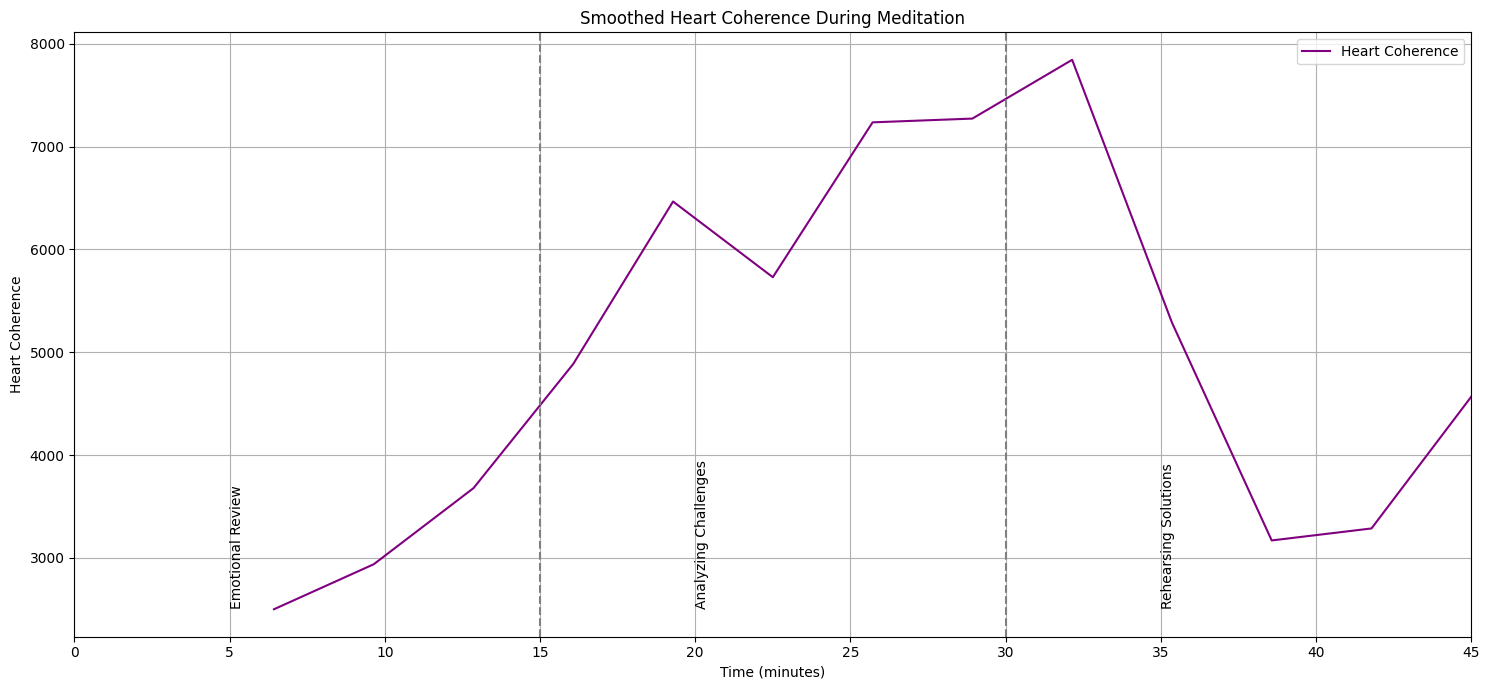

In [32]:

# Filter out rows corresponding to the "During Meditation" segment
plotted_data_during = data[data['Session'].str.contains("Med")]

# Smooth the heart coherence data
window_size = 3  # Define the window size for smoothing
smoothed_entire_data = plotted_data_during['Processed Heart Coherence'].rolling(window=window_size).mean()

# Adjusting the time vector for the meditation session to start from 0
adjusted_time_vector = np.linspace(0, 45, len(smoothed_entire_data))

# Plotting the smoothed data
plt.figure(figsize=(15, 7))
plt.plot(adjusted_time_vector, smoothed_entire_data, label='Heart Coherence', color='purple')

# Adding vertical lines to demarcate the three meditation components
for start in [15, 30]:
    plt.axvline(x=start, color='gray', linestyle='--')

# Adding annotations for meditation components
segments = ["Emotional Review", "Analyzing Challenges", "Rehearsing Solutions"]
for segment, start in zip(segments, [5, 20, 35]):
    plt.text(start, smoothed_entire_data.min(), segment, rotation=90, verticalalignment='bottom')

# Labeling and formatting the plot
plt.title('Smoothed Heart Coherence During Meditation')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Coherence')
plt.xlim(0, 45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 7 and 12th participants

In [41]:
data.columns

Index(['Participant', 'Session', 'LiveIBI'], dtype='object')

    Participant                 Session  \
6             7  Before Heart Coherence   
21            7  During Heart Coherence   
36            7   After Heart Coherence   

                                              LiveIBI  Computed Coherence  \
6   [708.0, 787.0, 754.0, 831.0, 753.0, 749.0, 839...          272.352499   
21  [892.0, 862.0, 810.0, 787.0, 751.0, 775.0, 807...        11737.932820   
36  [870.0, 761.0, 785.0, 764.0, 754.0, 766.0, 765...         1449.460415   

    Normalized Computed Coherence  \
6                        0.069608   
21                       3.000000   
36                       0.370455   

                                        Processed IBI  \
6   [-2.36792929e+01  2.23207071e+01  5.53207071e+...   
21  [ 77.53639847  77.53639847  25.53639847 ... -3...   
36  [ 2.71691792e+00  2.67169179e+01  5.71691792e+...   

    Heart Coherence (Processed)  \
6                  1.766767e+09   
21                 7.136915e+09   
36                 5.855089e+09   


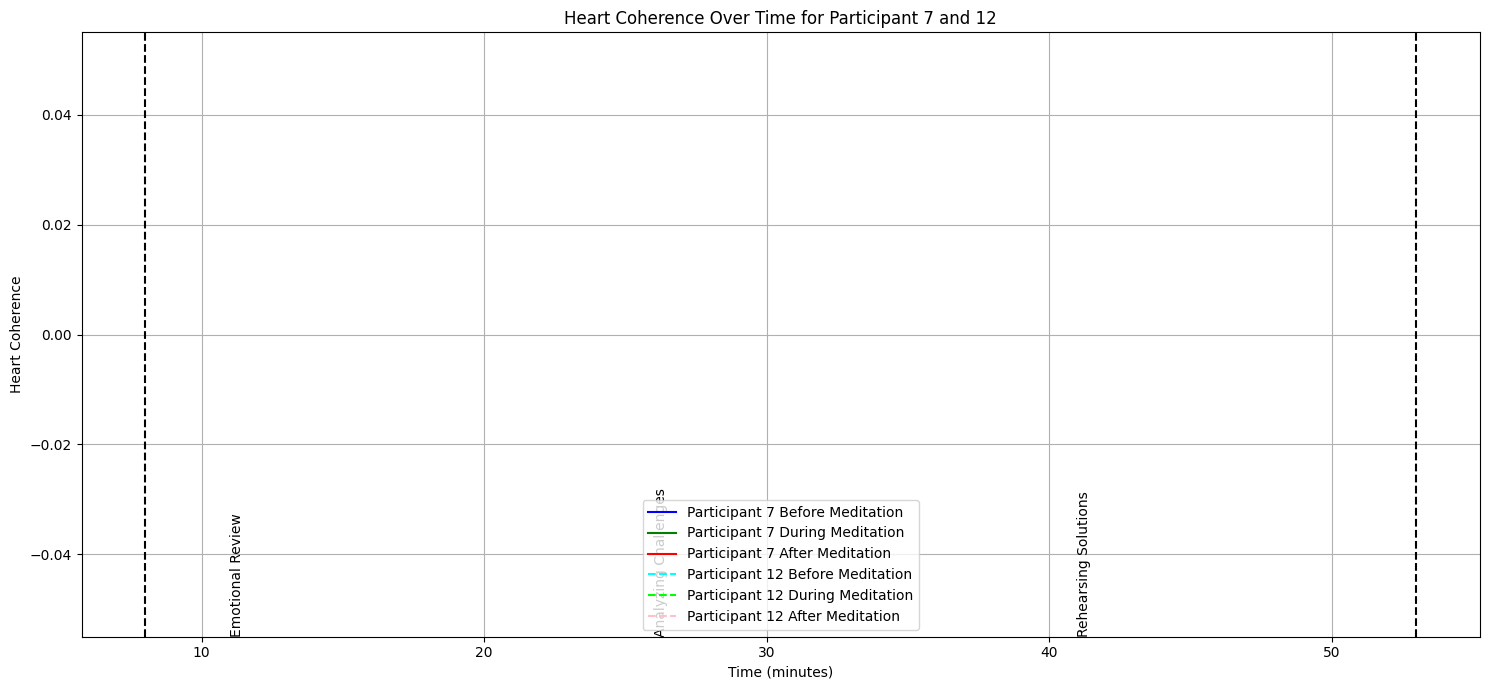

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = load_data('/content/drive/MyDrive/ASEE Feb 2024 HC calcs/processed_ibi_data.csv')

# Extract data for participants 7 and 12
data_7 = data[data['Participant'] == 7]
data_12 = data[data['Participant'] == 12]

print(data_7)
# Define the time vectors
time_before = np.linspace(0, 8, len(data_7[data_7['Session'] == 'Before']))
time_during = np.linspace(8, 53, len(data_7[data_7['Session'] == 'During']))
time_after = np.linspace(53, 61, len(data_7[data_7['Session'] == 'After']))

# Plotting
plt.figure(figsize=(15, 7))

# Plotting for Participant 7
plt.plot(time_before, data_7[data_7['Session'] == 'Before']['Processed Heart Coherence'], label='Participant 7 Before Meditation', color='blue')
plt.plot(time_during, data_7[data_7['Session'] == 'During']['Processed Heart Coherence'], label='Participant 7 During Meditation', color='green')
plt.plot(time_after, data_7[data_7['Session'] == 'After']['Processed Heart Coherence'], label='Participant 7 After Meditation', color='red')

# Plotting for Participant 12
plt.plot(time_before, data_12[data_12['Session'] == 'Before']['Processed Heart Coherence'], label='Participant 12 Before Meditation', color='cyan', linestyle='--')
plt.plot(time_during, data_12[data_12['Session'] == 'During']['Processed Heart Coherence'], label='Participant 12 During Meditation', color='lime', linestyle='--')
plt.plot(time_after, data_12[data_12['Session'] == 'After']['Processed Heart Coherence'], label='Participant 12 After Meditation', color='pink', linestyle='--')

# Adding dotted lines to separate the sessions
plt.axvline(x=8, color='black', linestyle='--')
plt.axvline(x=53, color='black', linestyle='--')

# Adding annotations for meditation components
segments = ["Emotional Review", "Analyzing Challenges", "Rehearsing Solutions"]
for segment, start in zip(segments, [11, 26, 41]):
    plt.text(start, plt.ylim()[0], segment, rotation=90, verticalalignment='bottom')

# Labeling and formatting the plot
plt.title('Heart Coherence Over Time for Participant 7 and 12')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Coherence')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
